In [3]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc
import keras.backend as K
import xgboost as xgb

from sklearn.metrics import mean_squared_error
from keras.models import Sequential, load_model  
from keras.layers.core import Dense, Activation  
from keras.layers import LSTM, Flatten, Dropout
from keras.models import Sequential
from keras.layers import Input,Dense, LSTM,TimeDistributed, Flatten, Reshape
from keras.models import Model
from keras.preprocessing import sequence
from keras.optimizers import Nadam
from keras import optimizers
from keras.layers.normalization import BatchNormalization

%matplotlib inline

Using TensorFlow backend.


## Date Preprocessing
### Data files can be downloaded from [here](https://drive.google.com/drive/folders/1Ygpg6PwQ9KiXTlbuUBQQffuqpjrBx97G?usp=sharing)

In [4]:
# X_training = pickle.load(open("X_train.pickle","rb"))
# Y_training = pickle.load(open("Y_train.pickle","rb"))
# X_testing = pickle.load(open("X_test.pickle","rb"))
# Y_testing = pickle.load(open("Y_test.pickle","rb"))

# X_training_un = pickle.load(open("X_train_un.pickle","rb"))
# Y_training_un = pickle.load(open("Y_train_un.pickle","rb"))
# X_testing_un = pickle.load(open("X_test_un.pickle","rb"))
# Y_testing_un = pickle.load(open("Y_test_un.pickle","rb"))

X_training = np.load("../data2/X_train.npy")
Y_training = np.load("../data2/Y_train.npy")

X_val = np.load("../data2/X_val.npy")
Y_val = np.load("../data2/Y_val.npy")

X_testing = np.load("../data2/X_test.npy")
Y_testing = np.load("../data2/Y_test.npy")

# X_training_un = pickle.load(open("X_train_un.pickle","rb"))
# Y_training_un = pickle.load(open("Y_train_un.pickle","rb"))
# X_testing_un = pickle.load(open("X_test_un.pickle","rb"))
# Y_testing_un = pickle.load(open("Y_test_un.pickle","rb"))


# X_training = np.concatenate((X_training, X_training_un), axis=0)
# Y_training = np.concatenate((Y_training, Y_training_un), axis=0)
# X_val = X_testing
# Y_val = Y_testing
# X_testing = np.concatenate((X_testing, X_testing_un), axis=0)
# Y_testing = np.concatenate((Y_testing, Y_testing_un), axis=0)


# Centering and Normalizing data


# X_training = X_training[0:10]
# Y_training = Y_training[0:10]

mux = np.mean(X_training, axis=0)
stdx = np.std(X_training, axis=0)
X_training = (X_training - mux)/stdx
X_val = (X_val - mux)/stdx
X_testing = (X_testing - mux)/stdx

In [8]:
X_training.shape

(3128654, 16)

In [3]:
def get_model(data_dim = 50):
    drop_per = 0.0
    input_layer = Input(shape=(data_dim,))
    hidden_layer1 = Dense(256, activation="tanh", name="hidden_layer1")(input_layer)
    batch_norm1 = BatchNormalization( name = "batch_norm_1")(hidden_layer1)
    drop1 = Dropout(drop_per)(hidden_layer1)#(batch_norm1)
    
    hidden_layer2 = Dense(128, activation="tanh", name="hidden_layer2")(drop1)
    batch_norm2 = BatchNormalization( name = "batch_norm_2")(hidden_layer2)
    drop2 = Dropout(drop_per)(batch_norm2)
    
    hidden_layer3 = Dense(64, activation="relu", name="hidden_layer3")(drop2)
    batch_norm3 = BatchNormalization( name = "batch_norm_3")(hidden_layer3)
    drop3 = Dropout(drop_per)(hidden_layer3)#(batch_norm3)
    
    hidden_layer4 = Dense(128, activation="relu", name="hidden_layer4")(drop3)
    batch_norm4 = BatchNormalization( name = "batch_norm_4")(hidden_layer4)
    drop4 = Dropout(drop_per)(batch_norm4)
    
    hidden_layer5 = Dense(256, activation="relu", name="hidden_layer5")(drop4)
    batch_norm5 = BatchNormalization( name = "batch_norm_5")(hidden_layer5)
    drop5 = Dropout(drop_per)(hidden_layer5)#(batch_norm5)
    
    output_layer = Dense(1, activation="linear")(drop5)
    model = Model(inputs = input_layer, output = output_layer)
    
    return model

## Training

In [12]:
n_epochs = 50
data_dim = X_training.shape[1]
optimizer = optimizers.Adadelta()#RMSprop(lr=1e-5)#, beta_1=0.9, beta_2=0.999, epsilon=1e-08)#, schedule_decay=0.004)
model = get_model(data_dim)
model.compile(loss="logcosh", optimizer=optimizer)

batch_size = 10000
L=len(X_training)
val_data = (X_val, Y_val)
model.fit(X_training, Y_training, batch_size=batch_size, epochs=n_epochs, validation_data=val_data)

/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


Train on 3128654 samples, validate on 1340852 samples
Epoch 1/50
3128654/3128654 [==============================] - 31s 10us/step - loss: 3.5308 - val_loss: 2.7080
Epoch 2/50
3128654/3128654 [==============================] - 32s 10us/step - loss: 2.1863 - val_loss: 2.1170
Epoch 3/50
3128654/3128654 [==============================] - 34s 11us/step - loss: 2.0839 - val_loss: 2.0499
Epoch 4/50
3128654/3128654 [==============================] - 28s 9us/step - loss: 2.0113 - val_loss: 1.9654
Epoch 5/50
3128654/3128654 [==============================] - 36s 11us/step - loss: 1.9565 - val_loss: 1.9423
Epoch 6/50
3128654/3128654 [==============================] - 32s 10us/step - loss: 1.9230 - val_loss: 1.8918
Epoch 7/50
3128654/3128654 [==============================] - 29s 9us/step - loss: 1.9024 - val_loss: 1.9139
Epoch 8/50
3128654/3128654 [==============================] - 34s 11us/step - loss: 1.8895 - val_loss: 1.8677
Epoch 9/50
3128654/3128654 [==============================] - 27s 9u

## Testing

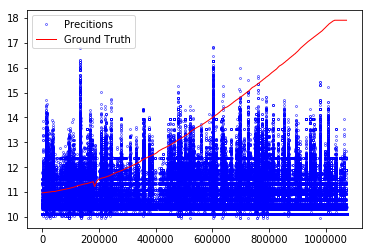

RMSE: 4.2811914922909535


In [7]:
preds = y_pred#model.predict(X_testing)
plt.plot(preds,'o',color='blue',markersize=2,mew=0.5,mec='blue',markerfacecolor='none')
plt.plot(Y_testing,'r',linewidth=1.0)
plt.legend(['Precitions', 'Ground Truth'])
plt.show()

rmse = np.sqrt(mean_squared_error(preds, Y_testing)) #np.sqrt(np.mean((preds-Y_testing)**2))
print("RMSE:", rmse)

In [8]:
preds.shape

(1072501,)

In [6]:
# # Save model
# model.save('model_mlp_time_data.h5')

# Load saved model
# model = load_model('model_mlp_time_data.h5')

## Model 2

In [3]:
# import xgboost as xgb

xgdmat=xgb.DMatrix(X_training,Y_training)
our_params={'eta':0.1,'seed':0,'subsample':0.8,'colsample_bytree':0.8,'objective':'reg:linear','max_depth':3,'min_child_weight':1}
final_gb=xgb.train(our_params,xgdmat)
tesdmat=xgb.DMatrix(X_testing)
y_pred=final_gb.predict(tesdmat)
print(y_pred)

[10.130647 10.130647 10.130647 ... 10.130647 10.130647 10.130647]


## Model 3

In [62]:
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=9, objective='reg:gamma')

xgb_model.fit(X_training, Y_training)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.08, max_delta_step=0,
       max_depth=9, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:gamma', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.75)

Val RMSE: 2.9435935970682534


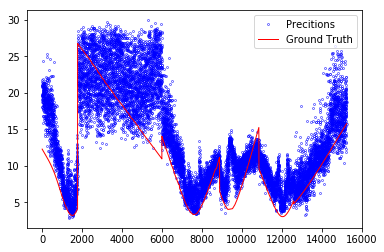

Test RMSE: 4.649093498184893


In [60]:
# 100 components, full data, n_estimators = 100, reg:gamma
preds = xgb_model.predict(X_val)
rmse = np.sqrt(mean_squared_error(preds, Y_val)) #np.sqrt(np.mean((preds-Y_testing)**2))
print("Val RMSE:", rmse)

preds = xgb_model.predict(X_testing)
plt.plot(preds,'o',color='blue',markersize=2,mew=0.5,mec='blue',markerfacecolor='none')
plt.plot(Y_testing,'r',linewidth=1.0)
plt.legend(['Precitions', 'Ground Truth'])
plt.show()

rmse = np.sqrt(mean_squared_error(preds, Y_testing)) #np.sqrt(np.mean((preds-Y_testing)**2))
print("Test RMSE:", rmse)

Val RMSE: 3.0552728580979878


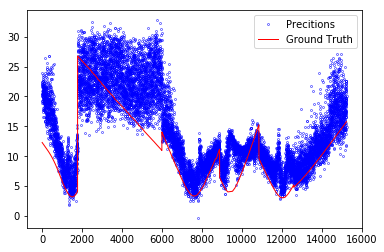

Test RMSE: 5.143919208506453


In [54]:
# 100 components, full data, n_estimators = 500
preds = xgb_model.predict(X_val)
rmse = np.sqrt(mean_squared_error(preds, Y_val)) #np.sqrt(np.mean((preds-Y_testing)**2))
print("Val RMSE:", rmse)

preds = xgb_model.predict(X_testing)
plt.plot(preds,'o',color='blue',markersize=2,mew=0.5,mec='blue',markerfacecolor='none')
plt.plot(Y_testing,'r',linewidth=1.0)
plt.legend(['Precitions', 'Ground Truth'])
plt.show()

rmse = np.sqrt(mean_squared_error(preds, Y_testing)) #np.sqrt(np.mean((preds-Y_testing)**2))
print("Test RMSE:", rmse)

Val RMSE: 3.0262971197318396


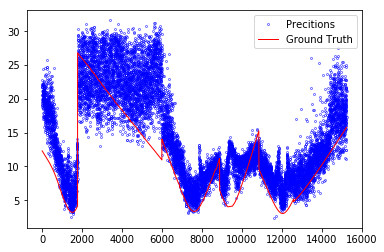

Test RMSE: 5.097147502729713


In [47]:
# 1000 components, full data
preds = xgb_model.predict(X_val)
rmse = np.sqrt(mean_squared_error(preds, Y_val)) #np.sqrt(np.mean((preds-Y_testing)**2))
print("Val RMSE:", rmse)

preds = xgb_model.predict(X_testing)
plt.plot(preds,'o',color='blue',markersize=2,mew=0.5,mec='blue',markerfacecolor='none')
plt.plot(Y_testing,'r',linewidth=1.0)
plt.legend(['Precitions', 'Ground Truth'])
plt.show()

rmse = np.sqrt(mean_squared_error(preds, Y_testing)) #np.sqrt(np.mean((preds-Y_testing)**2))
print("Test RMSE:", rmse)

Val RMSE: 2.9189071694604247


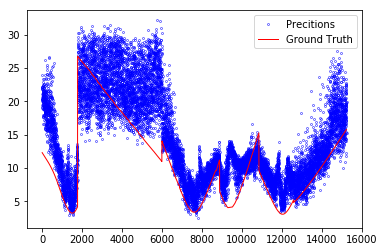

Test RMSE: 5.043606790950644


In [44]:
# 100 components, full data, n_estimators = 100
preds = xgb_model.predict(X_val)
rmse = np.sqrt(mean_squared_error(preds, Y_val)) #np.sqrt(np.mean((preds-Y_testing)**2))
print("Val RMSE:", rmse)

preds = xgb_model.predict(X_testing)
plt.plot(preds,'o',color='blue',markersize=2,mew=0.5,mec='blue',markerfacecolor='none')
plt.plot(Y_testing,'r',linewidth=1.0)
plt.legend(['Precitions', 'Ground Truth'])
plt.show()

rmse = np.sqrt(mean_squared_error(preds, Y_testing)) #np.sqrt(np.mean((preds-Y_testing)**2))
print("Test RMSE:", rmse)

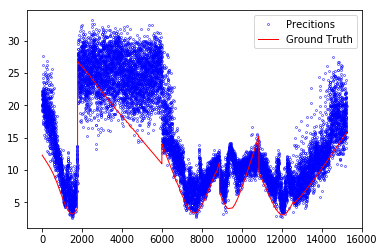

RMSE: 5.653224916283579


In [33]:
# 50 components, full data
preds = xgb_model.predict(X_val)
rmse = np.sqrt(mean_squared_error(preds, Y_val)) #np.sqrt(np.mean((preds-Y_testing)**2))
print("Val RMSE:", rmse)

preds = xgb_model.predict(X_testing)
plt.plot(preds,'o',color='blue',markersize=2,mew=0.5,mec='blue',markerfacecolor='none')
plt.plot(Y_testing,'r',linewidth=1.0)
plt.legend(['Precitions', 'Ground Truth'])
plt.show()

rmse = np.sqrt(mean_squared_error(preds, Y_testing)) #np.sqrt(np.mean((preds-Y_testing)**2))
print("Test RMSE:", rmse)

Val RMSE: 2.1963911657234974


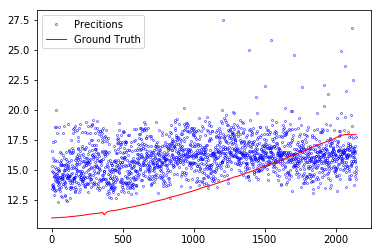

Test RMSE: 3.2183602370916846


In [36]:
# 50 components, red. data
preds = xgb_model.predict(X_val)
rmse = np.sqrt(mean_squared_error(preds, Y_val)) #np.sqrt(np.mean((preds-Y_testing)**2))
print("Val RMSE:", rmse)

preds = xgb_model.predict(X_testing)
plt.plot(preds,'o',color='blue',markersize=2,mew=0.5,mec='blue',markerfacecolor='none')
plt.plot(Y_testing,'r',linewidth=1.0)
plt.legend(['Precitions', 'Ground Truth'])
plt.show()

rmse = np.sqrt(mean_squared_error(preds, Y_testing)) #np.sqrt(np.mean((preds-Y_testing)**2))
print("Test RMSE:", rmse)

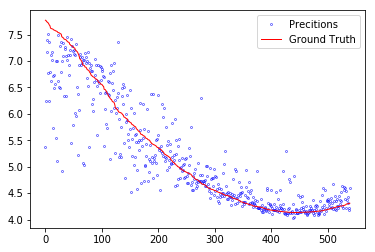

RMSE: 0.4754137519803222


In [8]:
# 50 components, old small data
preds = xgb_model.predict(X_val)
plt.plot(preds,'o',color='blue',markersize=2,mew=0.5,mec='blue',markerfacecolor='none')
plt.plot(Y_val,'r',linewidth=1.0)
plt.legend(['Precitions', 'Ground Truth'])
plt.show()

rmse = np.sqrt(mean_squared_error(preds, Y_val)) #np.sqrt(np.mean((preds-Y_testing)**2))
print("RMSE:", rmse)

Val RMSE: 4.120221104609824


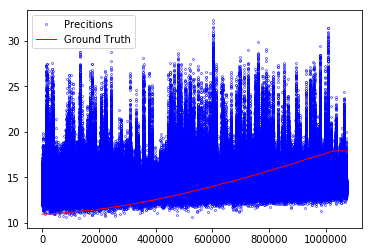

Test RMSE: 2.6339582745087045


In [39]:
## Time data
preds = xgb_model.predict(X_val)
rmse = np.sqrt(mean_squared_error(preds, Y_val)) #np.sqrt(np.mean((preds-Y_testing)**2))
print("Val RMSE:", rmse)

preds = xgb_model.predict(X_testing)
plt.plot(preds,'o',color='blue',markersize=2,mew=0.5,mec='blue',markerfacecolor='none')
plt.plot(Y_testing,'r',linewidth=1.0)
plt.legend(['Precitions', 'Ground Truth'])
plt.show()

rmse = np.sqrt(mean_squared_error(preds, Y_testing)) #np.sqrt(np.mean((preds-Y_testing)**2))
print("Test RMSE:", rmse)

Val RMSE: 4.331599974366836


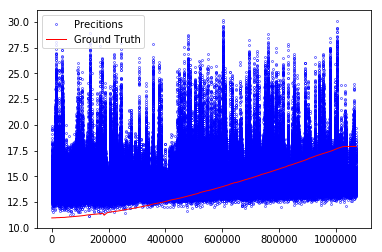

Test RMSE: 2.548686750948946


In [63]:
## Time data, reg:gamma
preds = xgb_model.predict(X_val)
rmse = np.sqrt(mean_squared_error(preds, Y_val)) #np.sqrt(np.mean((preds-Y_testing)**2))
print("Val RMSE:", rmse)

preds = xgb_model.predict(X_testing)
plt.plot(preds,'o',color='blue',markersize=2,mew=0.5,mec='blue',markerfacecolor='none')
plt.plot(Y_testing,'r',linewidth=1.0)
plt.legend(['Precitions', 'Ground Truth'])
plt.show()

rmse = np.sqrt(mean_squared_error(preds, Y_testing)) #np.sqrt(np.mean((preds-Y_testing)**2))
print("Test RMSE:", rmse)

## Visualizing Activations

In [ ]:
weights = model.get_weights()
k=0
for i in range(len(weights)):
    shape = weights[i].shape
    if(len(shape)>1):
        fileName = "mlp_weights_layer_{}.png".format(k)
        plt.figure()
        plt.imshow(weights[i])
        plt.colorbar()
        plt.savefig(fileName)
plt.show()

## Visualizing Activations

In [ ]:
def get_activations(model, model_inputs, print_shape_only=False, layer_name=None):
    activations = []
    inp = model.input
    
    model_multi_inputs_cond = True
    if not isinstance(inp, list):
        inp = [inp]
        model_multi_inputs_cond = False

    outputs = [layer.output for layer in model.layers if
               layer.name == layer_name or layer_name is None]  # all layer outputs

    funcs = [K.function(inp + [K.learning_phase()], [out]) for out in outputs]  # evaluation functions

    if model_multi_inputs_cond:
        list_inputs = []
        list_inputs.extend(model_inputs)
        list_inputs.append(0.)
    else:
        list_inputs = [model_inputs, 0.]

    layer_outputs = [func(list_inputs)[0] for func in funcs]
    for layer_activations in layer_outputs:
        activations.append(layer_activations)

    return activations

In [ ]:
test_sample_num = 0
activation_map = get_activations(model, np.reshape(X_testing[test_sample_num,:], (1, X_testing.shape[1])))
layers = [0, 3, 6, 9, 10]

for key, layer in enumerate(layers):
    
    activations = activation_map[layer][0]
    subplot_num = len(layers)*100 + 1*10 + key+1
    plt.subplot(subplot_num)
    plt.gca().get_yaxis().set_visible(False)
    plt.imshow(np.reshape(activations, (1, len(activations))), interpolation = 'nearest', aspect='auto')
cax = plt.axes([1, 0.1, 0.075, 0.8])
plt.tight_layout()
plt.colorbar(cax=cax)
plt.show()